<a href="https://colab.research.google.com/github/diegormsouza/goes-r_datajam_2023/blob/main/INPE_GOES_R_DataJam_Sept_2023_Short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

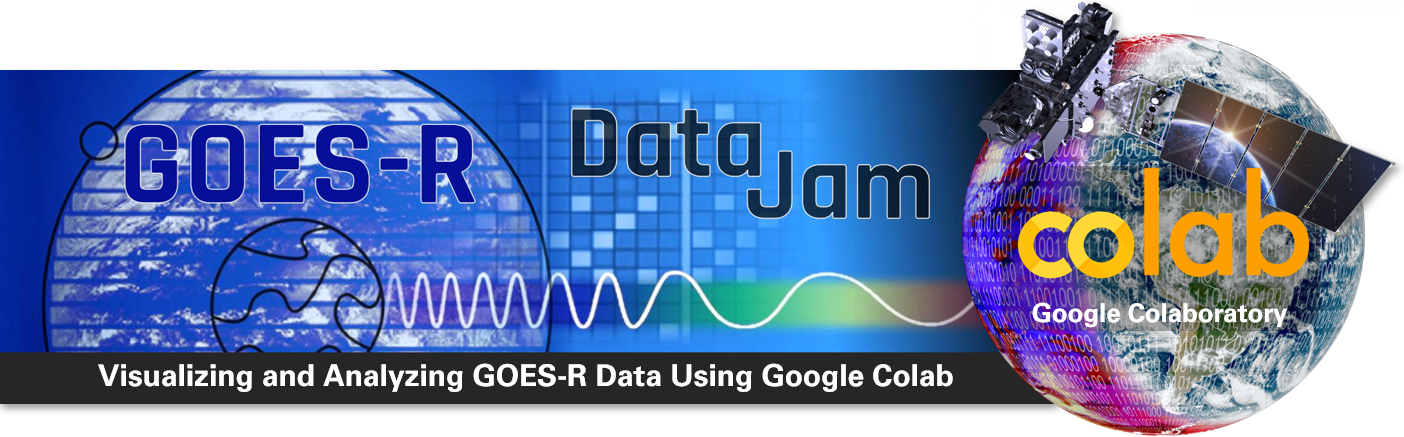

**Developed by:** Diego Souza - INPE / CGCT / DISSM - Brazil

**COLAB Notebook Version:** September 07, 2023

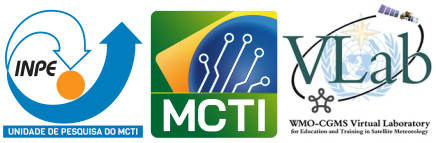

### **Contact:**
####Diego Souza - INPE / CGCT / DISSM - (diego.souza@inpe.br)
https://github.com/diegormsouza/

# **Introduction**

Welcome to the **"GOES-R Data Processing With Python"** DataJam COLAB Notebook (short version)!

---


This interactive COLAB notebook contains instructions for installing the libraries needed to create Python scripts to manipulate GOES-R data. All instructions and scripts run directly in the cloud, and there is no need to install tools and download files locally (in your computers). To run the code cells, just click on the "Play" icon in square brackets on the upper left side of each cell.

# **Installing the Required Python Libraries and Downloading Ancillary Files**

In this step we install the libraries needed to run the scripts and download some GOES-R samples:

Python libraries:

*   **NetCDF4:** Read the pixel values from the NetCDF4 files.
*   **Cartopy:** Add maps to our plots.

Sample imagery:
*   **OR_ABI-L2-CMIPF-M6C*_G16_s*_e*_c*.nc:** GOES-16 data sample (ABI sensor) - FULL DISK
*   **OR_ABI-L2-CMIPC-M6C*_G16_s*_e*_c*.nc:** GOES-16 data sample (ABI sensor) - CONUS
*   **OR_ABI-L2-CMIPM1-M6C*_G16_s*_e*_c*.nc:** GOES-16 data sample (ABI sensor) - MESOSCALE 1




In [ ]:
# installing the NetCDF4 library
!pip install netcdf4
print('\n')

# installing the Cartopy library
!pip install cartopy
!pip install shapely --no-binary shapely --force
print('\n')

# Create the 'samples' directory
!mkdir -p samples # where we will store the GOES-R samples
print('\n')

# download some GOES-16 samples from Amazon Web Services (AWS) with wget
# note: the links were taken from the following page: https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi

# Band 13 (10.3μ) - August 29, 15:00 UTC (Full Disk)
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2023/241/15/OR_ABI-L2-CMIPF-M6C13_G16_s20232411500206_e20232411509526_c20232411509585.nc -P /content/samples/

# Band 02 (0.64μ) - August 29, 15:00 UTC (CONUS)
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPC/2023/241/15/OR_ABI-L2-CMIPC-M6C02_G16_s20232411501172_e20232411503545_c20232411504026.nc -P /content/samples/

# Band 02 (0.64μ) - August 29, 15:00 UTC (MESOSCALE 1)
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPM/2023/241/15/OR_ABI-L2-CMIPM1-M6C02_G16_s20232411500279_e20232411500336_c20232411500395.nc -P /content/samples/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.8 MB/s eta 0:00:00
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890028 sha256=846fb622eebe4131682de1cef786bcf55a5278b3b744ac77dc143c0502f323c1
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Success





--2023-09-08 12:28:52--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2023/241/15/OR_ABI-L2-CMIPF-M6C13_G16_s20232411500206_e20232411509526_c20232411509585.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 3.5.29.144, 16.182.37.9, 3.5.28.242, ...
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|3.5.29.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22945446 (22M) [binary/octet-stream]
Saving to: ‘/content/samples/OR_ABI-L2-CMIPF-M6C13_G16_s20232411500206_e20232411509526_c20232411509585.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  21.88M  23.6MB/s    in 0.9s    

2023-09-08 12:28:53 (23.6 MB/s) - ‘/content/samples/OR_ABI-L2-CMIPF-M6C13_G16_s20232411500206_e20232411509526_c20232411509585.nc’ saved [22945446/22945446]

--2023-09-08 12:28:53--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPC/2023/241/15/OR_ABI-L2-CMIPC-M6C02_G16_s20232411501172_e20232411503545_c20232411504026.nc
Resolving no

# **Reference Table: GOES-R Channels and Wavelengths**

For your reference, this is a table with all ABI bands, central wavelenghts, resolutions and spectral ranges:

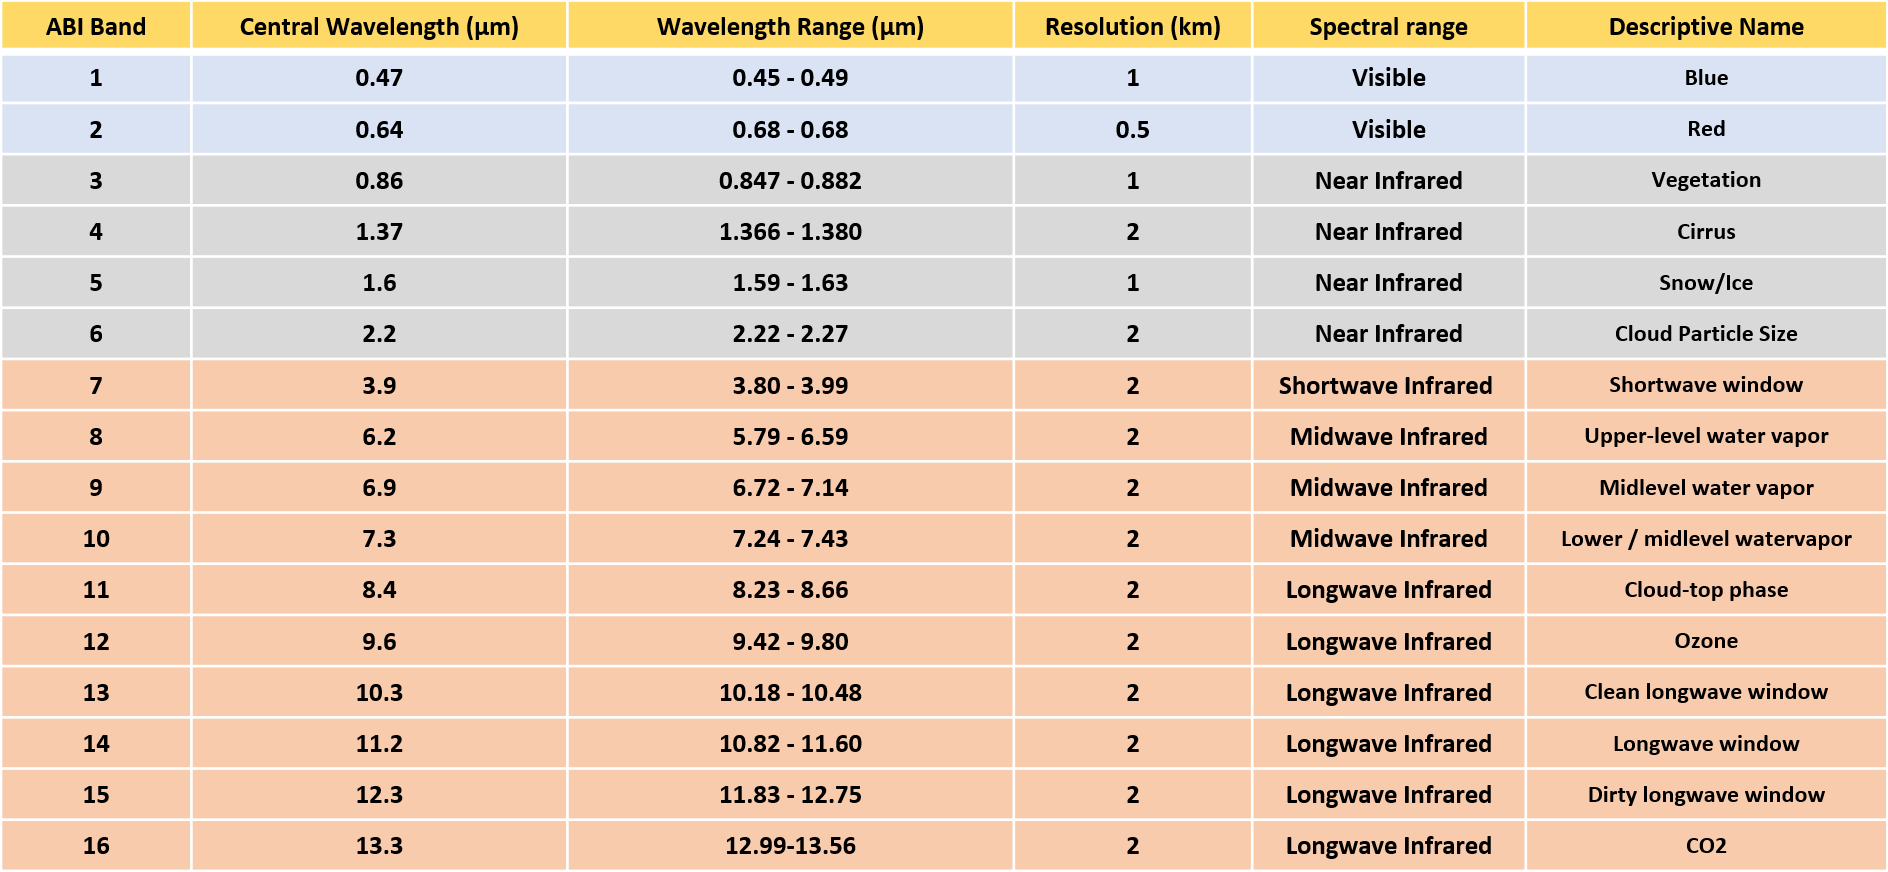

# **Import the Required Python Libraries**

In this step we will import all the libraries we will need for this demonstration: **"netCDF4"** to open files and read the pixel values, **"matplotlib"** to generate images, **"datetime"** to read the aqcuisition time and date, **"cartopy"** to add maps and **"numpy"** to make some calculations when needed.

In [ ]:
# required modules
from netCDF4 import Dataset         # read / write NetCDF4 files
import matplotlib.pyplot as plt     # plotting library
from datetime import datetime       # basic dates and time types
import cartopy, cartopy.crs as ccrs # plot maps
import numpy as np                  # scientific computing with Python

# **Opening a GOES-16 File with the NetCDF4 Library and Checking the Available Datasets**

First, we will create an object called **"file"** (you may call it anyway you want) and open a GOES-16 ABI image with the NetCDF4 **"Dataset"** command:

In [ ]:
# open the GOES-R NetCDF file
file = Dataset("samples/OR_ABI-L2-CMIPF-M6C13_G16_s20232411500206_e20232411509526_c20232411509585.nc")

We have several datasets inside a NetCDF file (with very useful information!). With the **"variables.keys()"** command, we can list all the available datasets.

In [ ]:
# listing the key NetCDF variables
file.variables.keys()

dict_keys(['CMI', 'DQF', 't', 'y', 'x', 'time_bounds', 'goes_imager_projection', 'y_image', 'y_image_bounds', 'x_image', 'x_image_bounds', 'nominal_satellite_subpoint_lat', 'nominal_satellite_subpoint_lon', 'nominal_satellite_height', 'geospatial_lat_lon_extent', 'band_wavelength', 'band_id', 'total_number_of_points', 'valid_pixel_count', 'outlier_pixel_count', 'min_brightness_temperature', 'max_brightness_temperature', 'mean_brightness_temperature', 'std_dev_brightness_temperature', 'planck_fk1', 'planck_fk2', 'planck_bc1', 'planck_bc2', 'algorithm_dynamic_input_data_container', 'percent_uncorrectable_GRB_errors', 'percent_uncorrectable_L0_errors', 'earth_sun_distance_anomaly_in_AU', 'processing_parm_version_container', 'algorithm_product_version_container', 'esun', 'kappa0', 'focal_plane_temperature_threshold_exceeded_count', 'maximum_focal_plane_temperature', 'focal_plane_temperature_threshold_increasing', 'focal_plane_temperature_threshold_decreasing', 'channel_integration_time', '

Let's check the characteristics of the **"CMI"** dataset (or "Cloud and Moisture Imagery", as NOAA calls it). According to the product documentation, this is the dataset where we may retrieve the **"reflectance factor"** (for visible bands) and the **"brightness temperatures"** for IR bands:

https://www.goes-r.gov/products/baseline-cloud-moisture-imagery.html

In [ ]:
# reading a specific variable
file.variables['CMI']

<class 'netCDF4._netCDF4.Variable'>
int16 CMI(y, x)
    _FillValue: -1
    long_name: ABI L2+ Cloud and Moisture Imagery brightness temperature
    standard_name: toa_brightness_temperature
    _Unsigned: true
    sensor_band_bit_depth: 12
    valid_range: [   0 4095]
    scale_factor: 0.06145332
    add_offset: 89.62
    units: K
    resolution: y: 0.000056 rad x: 0.000056 rad
    coordinates: band_id band_wavelength t y x
    grid_mapping: goes_imager_projection
    cell_methods: t: point area: point
    ancillary_variables: DQF
unlimited dimensions: 
current shape = (5424, 5424)
filling on

Please note that for this particular channel (Band 13 - 10.3 µm - 2 km - Full Disk) we have **5424 rows x 5424 columns**. For a 1 km Full Disk band we would have twice as much and for a 0.5 km Full Disk band we would have 4 times as much (plotting a 0.5 km band requires good computational power). Please also note that the unit for this particular band is Kelvin.

Considering that, let's read the CMI dataset and create a preliminary plot.

# **Reading and Plotting the CMI (Cloud and Moisture Imagery) Dataset**

First, we will read the CMI dataset pixel values, convert the pixels to °C and store all values from this 2D array (5424 x 5424) to the **"data"** variable (again, you may call it anyway you want). We will use this variable to plot an image, but remember, you have all the Brightness Temperature (BT) values in a 2D array, so you can use it anyway you want (perform any calculation, make graphs, etc).

In [ ]:
# get the pixel values
data = file.variables['CMI'][:] - 273.15

Now, we will set the image size (in inches) and plot the **"data"** variable with a grayscale colormap, called **"Greys"** (white for lower BT - brightness temperature values and black for higher BT values) using the "imshow" command from matplotlib.

We will pass some parameters to the **"imshow"** command:
- **"data"**: the variable we want to plot.

- **"vmin"** and **"vmax"**: the minimum and maximum values of the colormap. You may adjust this values according to your preference.

- **"cmap"**: the colormap to be used. Please access the following link for a list of default colormaps from matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html

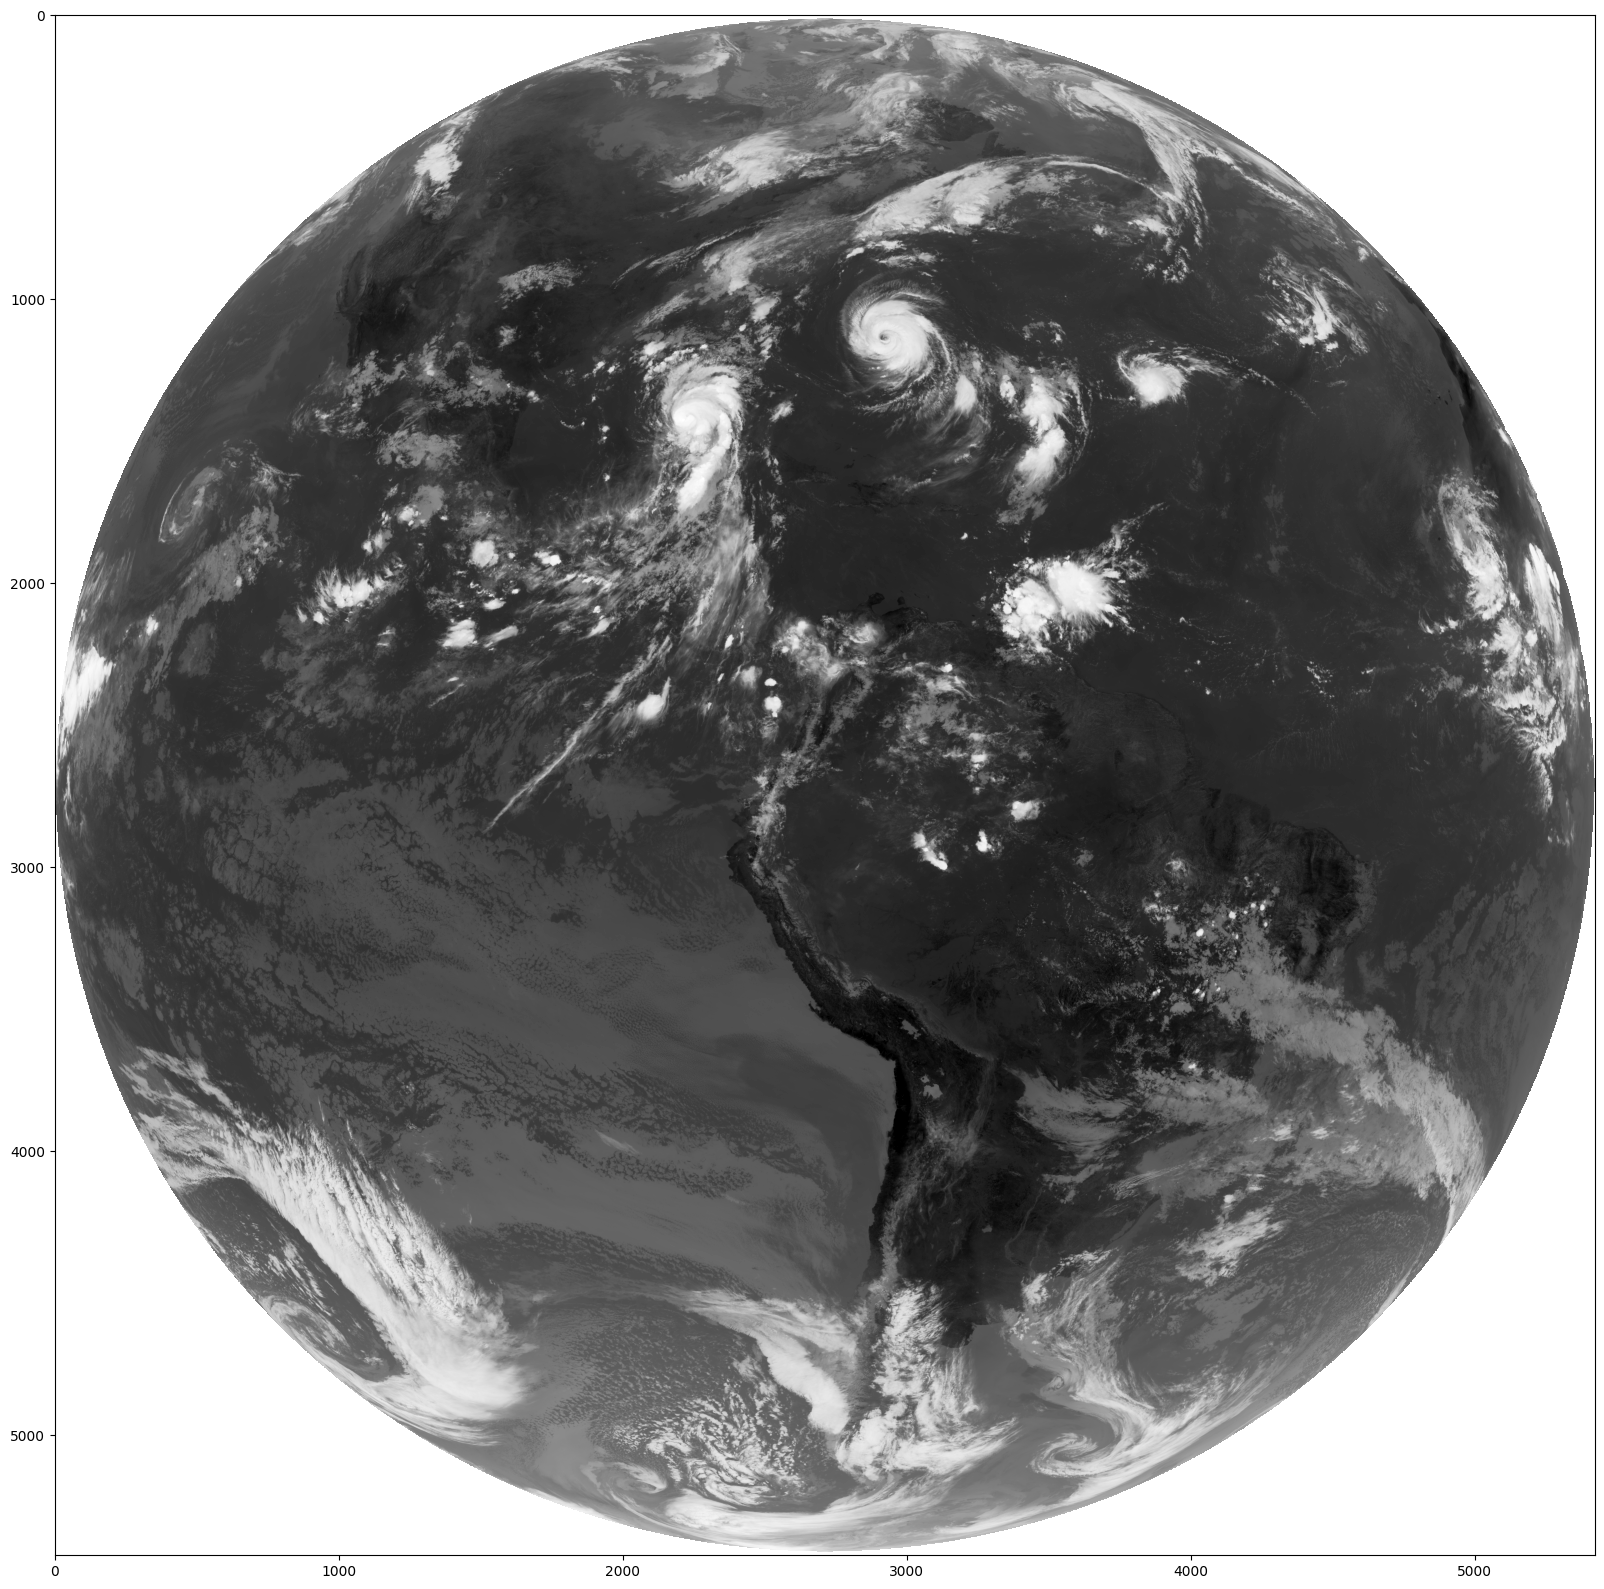

In [ ]:
# choose the plot size (width x height, in inches)
plt.figure(figsize=(20,20))

# plot the image
plt.imshow(data, vmin=-80, vmax=40, cmap='Greys')

# **Reading the Acquisition Time/Date and Adding a Title and Colorbar**

Let's add some decorations to our plot. We want to add a title with the ABI acquisition time and date (start of the 10 min full disk scan).

First, let's check the format of the time and date information available from the NetCDF metadata (**"time_coverage_start"** global attribute):

In [ ]:
file.getncattr('time_coverage_start')

'2023-08-29T15:00:20.6Z'

To create a **"datetime" object**, we need to inform how this information is formatted. As we have seen above, for GOES-R data we have 4 digits for the year ("2023"), a hyphen "-", two digits for the month ("09"), a hyphen "-", two digits for the day ("07"), an uppercase "T", two digits for the hours ("15"), a colon ":", two digits for the minutes ("00"), a colon ":", two digits for the seconds ("20"), a point ".", one digit for the milliseconds ("6") and an uppercase "Z".

According to the datetime library format codes (https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes), a **"%Y"** means 4 digits for year, **"%m"** means 2 digits for months, **"%d"** means two digits for days, **"%H"** means two digits for hours, **"%M"** means two digits for minutes, **"%S"** means two digits for seconds and **"%f"** stands for microseconds.

Let's create a datatime object, reading the time/date from the NetCDF file and informing how it is formatted.

In [ ]:
# read the time/date from the NetCDF file metadata as a string
date_string = file.getncattr('time_coverage_start')

# how this time/date is formatted (using the timedate convention)
date_format = '%Y-%m-%dT%H:%M:%S.%fZ'

# create the datetime object
date_obj = datetime.strptime(date_string, date_format)
print(date_obj)

2023-08-29 15:00:20.600000


Now that we have a datetime object we can create **our own custom string**, formatted the way we want, using the same datetime convention directives found at the same link (https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes). In the example below we will create a string with the **year, month, day, hour, minutes, followed by "UTC"**:

In [ ]:
date = date_obj.strftime('%Y-%m-%d %H:%M UTC')
print(date)

2023-08-29 15:00 UTC


But we could create a string using **any datetime convention we want**, like in the example below (added the weekday with the datetime **"%A"** directive and the month with the datetime **"%B"** directive in this example):

In [ ]:
date_obj.strftime('%A - %B %d %Y - %H:%M UTC')

'Tuesday - August 29 2023 - 15:00 UTC'

Now that we already know how to read and format the aqcuisition time and date, let's create a plot adding the datetime string as a title. We will also add a colorbar with the **"colorbar"** command:

Text(1.0, 1.0, 'GOES-R DataJam')

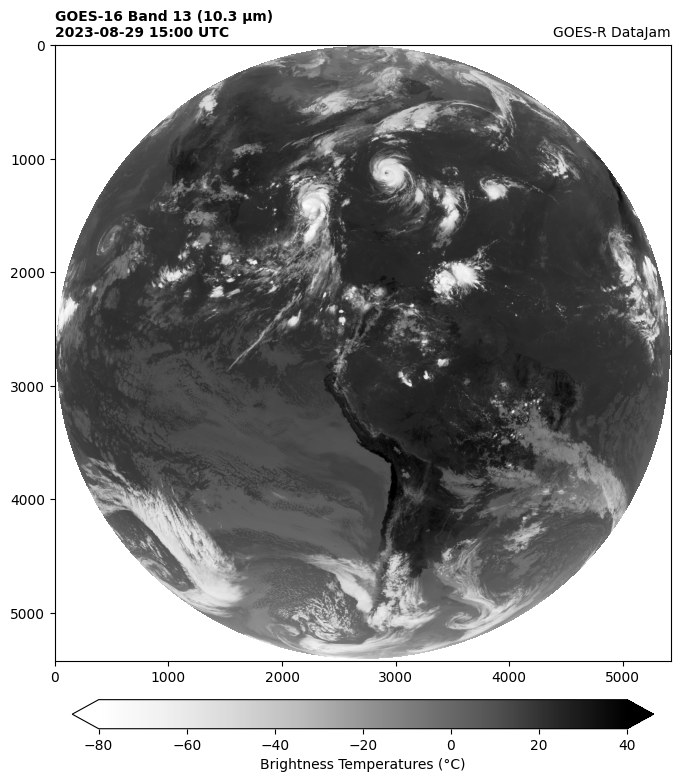

In [ ]:
# choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# plot the image
plt.imshow(data, vmin=-80, vmax=40, cmap='Greys')

# add a colorbar
plt.colorbar(label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, shrink=0.75)

# add a title (one on the left and one on the right)
plt.title(f'GOES-16 Band 13 (10.3 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('GOES-R DataJam', fontsize=10, loc='right')

# **Adding maps with Cartopy**

Let's add some maps to our plot. The first thing we need to do is declaring the projection of our data. We will use the Cartopy "geostationary" projection. For a complete list of the supported projections, please check this link: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

For the geostationary projection, we need to inform the **central longitude** and the **satellite height**. Fortunatelly, we can read this information from the GOES-R NetCDF4 metadata.

With this, we can also add **country borders, coastlines, gridlines** and other features provided by Cartopy.

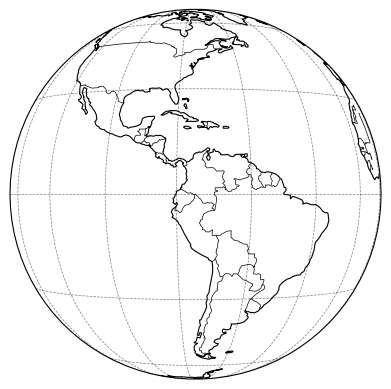

In [ ]:
# read the satellite longitude from the metadata
longitude = file.variables['goes_imager_projection'].longitude_of_projection_origin

# read the satellite altitude from the metadata
height = file.variables['goes_imager_projection'].perspective_point_height

# use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude, satellite_height=height))

# add coastlines, borders and gridlines
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
ax.coastlines(resolution='110m', color='black', linewidth=0.8)
ax.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.5)

We also need to inform the **"extent"** of our data. According to the product documentation (https://www.goes-r.gov/products/docs/PUG-L2+-vol5.pdf), the extent can be calculated by **multiplying half of the full disk by the pixel size in radians by the satellite height**. Again, all this information is provided in the metadata.
Calculating this by reading the metadata is very useful: as we will see, we can use the same scripts to plot the **Full Disk, CONUS and Mesoscale sectors**:

In [ ]:
# calculate the extent of the GOES-R full disk in decimals (2712*0.000056*35786023.0)
xmin = file.variables['x'][:].min() * height
xmax = file.variables['x'][:].max() * height
ymin = file.variables['y'][:].min() * height
ymax = file.variables['y'][:].max() * height

# list with the extent
img_extent = (xmin, xmax, ymin, ymax)
print(img_extent)

(-5433892.69232443, 5433892.69232443, -5433892.69232443, 5433892.69232443)


Finally, we can overlay maps to our plot with the cartopy library:

Text(1.0, 1.0, 'GOES-R DataJam')

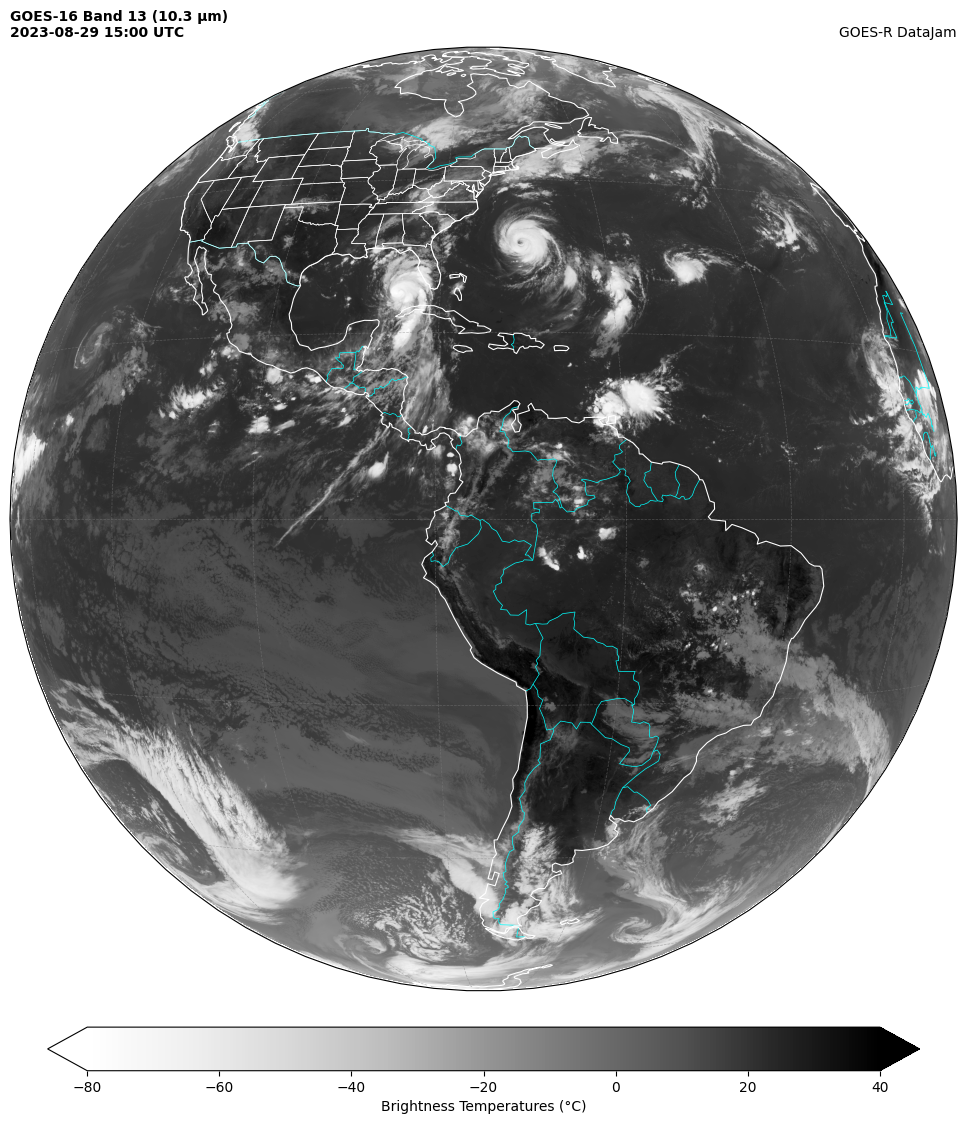

In [ ]:
# open the GOES-R NetCDF file
file = Dataset("samples/OR_ABI-L2-CMIPF-M6C13_G16_s20232411500206_e20232411509526_c20232411509585.nc")

# get the pixel values
data = file.variables['CMI'][:] - 273.15

# choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude, satellite_height=height))

# calculate the extent of the GOES-R full disk in decimals (2712*0.000056*35786023.0)
xmin = file.variables['x'][:].min() * height
xmax = file.variables['x'][:].max() * height
ymin = file.variables['y'][:].min() * height
ymax = file.variables['y'][:].max() * height

# list with the extent
img_extent = (xmin, xmax, ymin, ymax)

# add coastlines, borders and gridlines
ax.add_feature(cartopy.feature.BORDERS, edgecolor='cyan', linewidth=0.5)
ax.add_feature(cartopy.feature.STATES, edgecolor='white', linewidth=0.5)
ax.coastlines(resolution='110m', color='white', linewidth=0.8)
ax.gridlines(color='gray', alpha=0.5, linestyle='--', linewidth=0.5)

# plot the image
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')

# add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.03, shrink=0.75)

# add a title (one on the left and one on the right)
plt.title(f'GOES-16 Band 13 (10.3 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('GOES-R DataJam', fontsize=10, loc='right')

# **Plotting a CONUS Image**

You can use the same commands to plot a CONUS image (available every 5 minutes). We are calculating the extent from the metadata, so everything (image extent, etc) will be done automatically. Please note that we are plotting a **0.64 µm** (visible) image (500 m resolution), so we are not converting to "°C" anymore and the **vmin is 0 and vmax is 1**. Also, the colormap is **"gray"**, with black for lower reflectance values and white for greater reflectance values:

Text(1.0, 1.0, 'GOES-R DataJam')

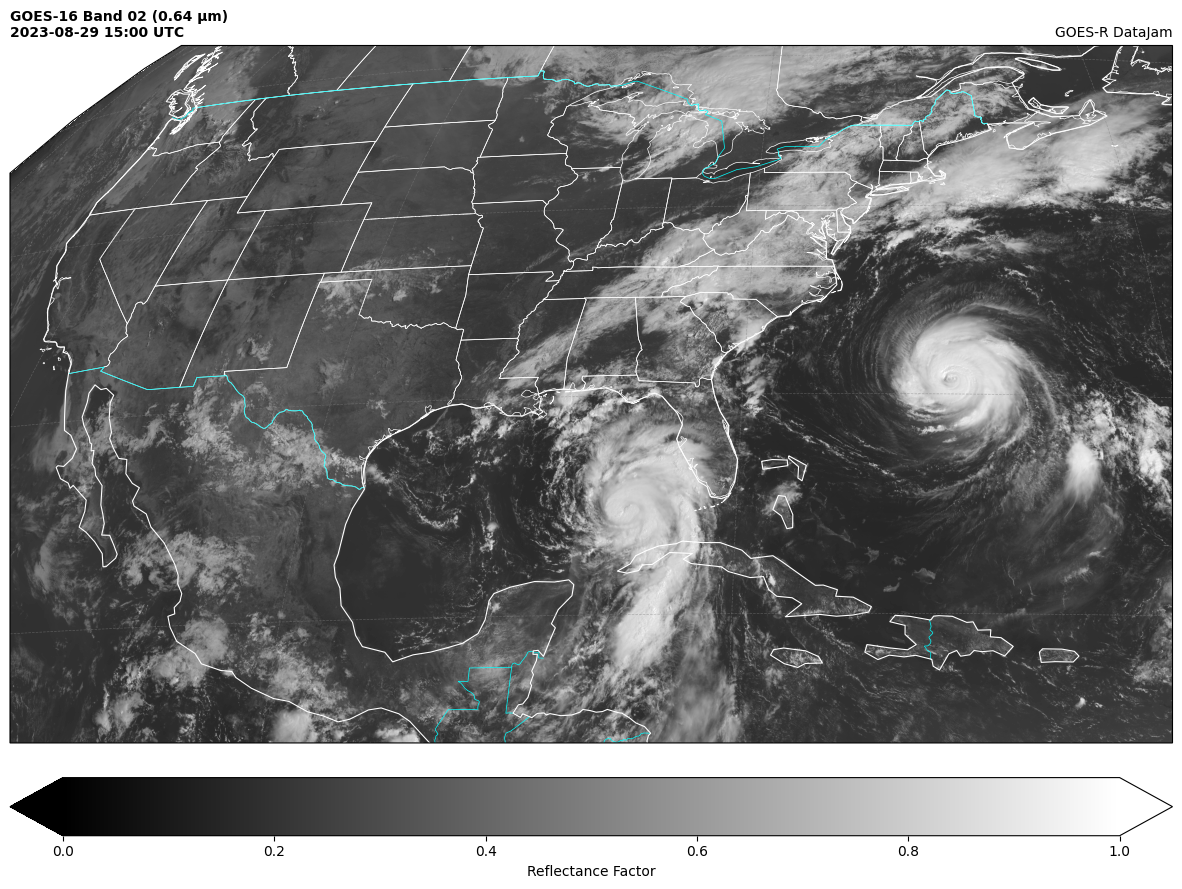

In [ ]:
# open the GOES-R NetCDF file
file = Dataset("samples/OR_ABI-L2-CMIPC-M6C02_G16_s20232411501172_e20232411503545_c20232411504026.nc")

# get the pixel values
data = file.variables['CMI'][:]

# apply the square root visible enhancement (optional)
data = np.sqrt(data)

# choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# read the satellite longitude from the metadata
longitude = file.variables['goes_imager_projection'].longitude_of_projection_origin

# read the satellite altitude from the metadata
height = file.variables['goes_imager_projection'].perspective_point_height

# use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude, satellite_height=height))

# calculate the extent of the GOES-R full disk in decimals (2712*0.000056*35786023.0)
xmin = file.variables['x'][:].min() * height
xmax = file.variables['x'][:].max() * height
ymin = file.variables['y'][:].min() * height
ymax = file.variables['y'][:].max() * height

# list with the extent
img_extent = (xmin, xmax, ymin, ymax)

# add coastlines, borders and gridlines
ax.add_feature(cartopy.feature.STATES, edgecolor='white', linewidth=0.5)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='cyan', linewidth=0.5)
ax.coastlines(resolution='110m', color='white', linewidth=0.8)
ax.gridlines(color='gray', alpha=0.5, linestyle='--', linewidth=0.5)

# plot the image
img = ax.imshow(data, vmin=0, vmax=1, origin='upper', extent=img_extent, cmap='gray')

# add a colorbar
plt.colorbar(img, label='Reflectance Factor', extend='both', orientation='horizontal', pad=0.03)

# add a title (one on the left and one on the right)
plt.title(f'GOES-16 Band 02 (0.64 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('GOES-R DataJam', fontsize=10, loc='right')

# **Plotting a MESOSCALE Image**

You can also use the same commands to plot a MESOSCALE image, a 1000x1000 km sector available every minute (in the example below we are plotting MESOSCALE number 1, which in this case - hurricane Idalia - was available every 30 seconds!).


Text(1.0, 1.0, 'GOES-R DataJam')

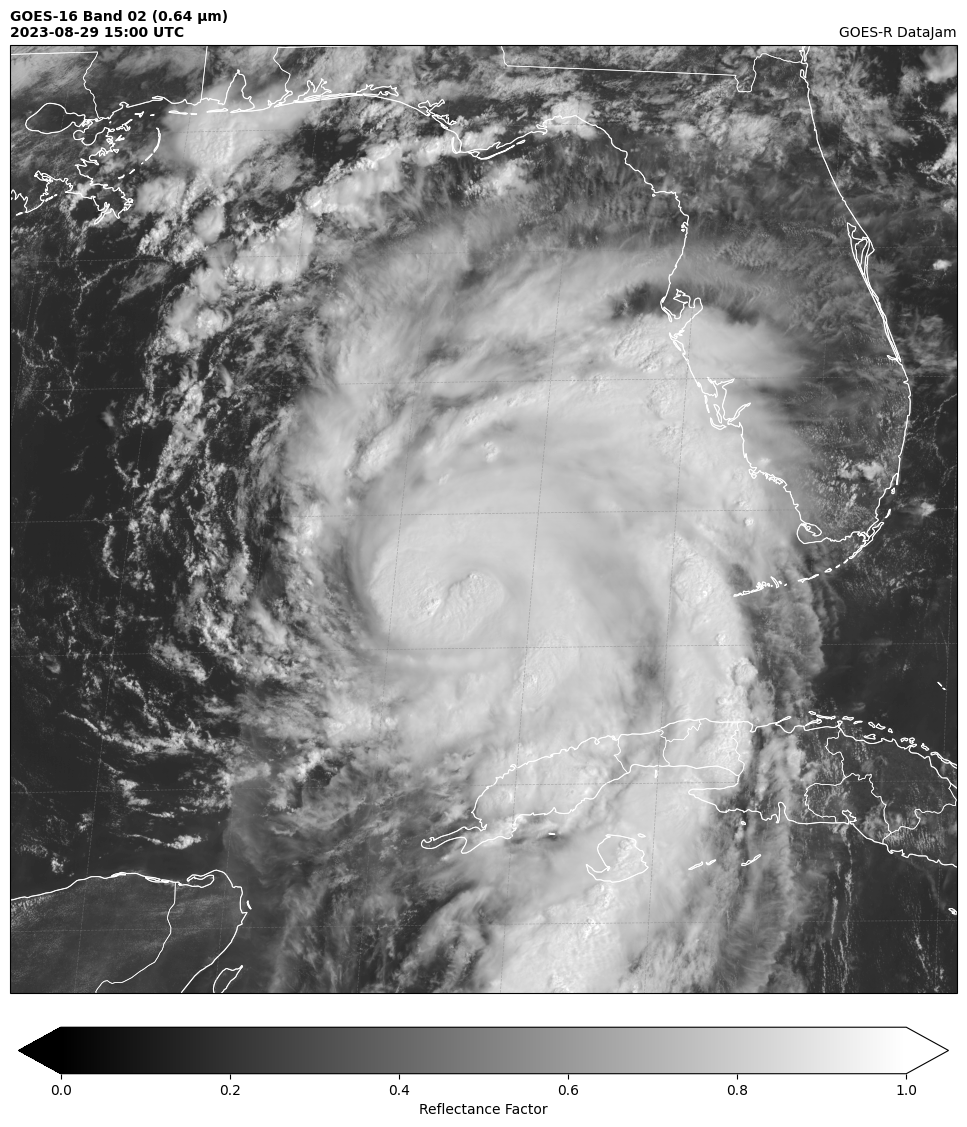

In [ ]:
# open the GOES-R NetCDF file
file = Dataset("samples/OR_ABI-L2-CMIPM1-M6C02_G16_s20232411500279_e20232411500336_c20232411500395.nc")

# get the pixel values
data = file.variables['CMI'][:]

# apply the square root visible enhancement (optional)
data = np.sqrt(data)

# choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# read the satellite longitude from the metadata
longitude = file.variables['goes_imager_projection'].longitude_of_projection_origin

# read the satellite altitude from the metadata
height = file.variables['goes_imager_projection'].perspective_point_height

# use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude, satellite_height=height))

# calculate the extent of the GOES-R full disk in decimals (2712*0.000056*35786023.0)
xmin = file.variables['x'][:].min() * height
xmax = file.variables['x'][:].max() * height
ymin = file.variables['y'][:].min() * height
ymax = file.variables['y'][:].max() * height

# list with the extent
img_extent = (xmin, xmax, ymin, ymax)

# add coastlines, borders and gridlines
ax.add_feature(cartopy.feature.STATES, edgecolor='white', linewidth=0.5)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='cyan', linewidth=0.5)
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.gridlines(color='gray', alpha=0.5, linestyle='--', linewidth=0.5)

# plot the image
img = ax.imshow(data, vmin=0, vmax=1, origin='upper', extent=img_extent, cmap='gray')

# add a colorbar
plt.colorbar(img, label='Reflectance Factor', extend='both', orientation='horizontal', pad=0.03, shrink=0.80)

# add a title (one on the left and one on the right)
plt.title(f'GOES-16 Band 02 (0.64 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('GOES-R DataJam', fontsize=10, loc='right')

And that's it! For a longer Colab notebook with much more examples (reading shapefiles, cropping an image, downloading data from the cloud with scripts, GLM, RGBs and much more), please access the following notebook:

https://colab.research.google.com/drive/1_QjqpUEBmABudnshTJn3EPS-Pvtma8wv?usp=sharing

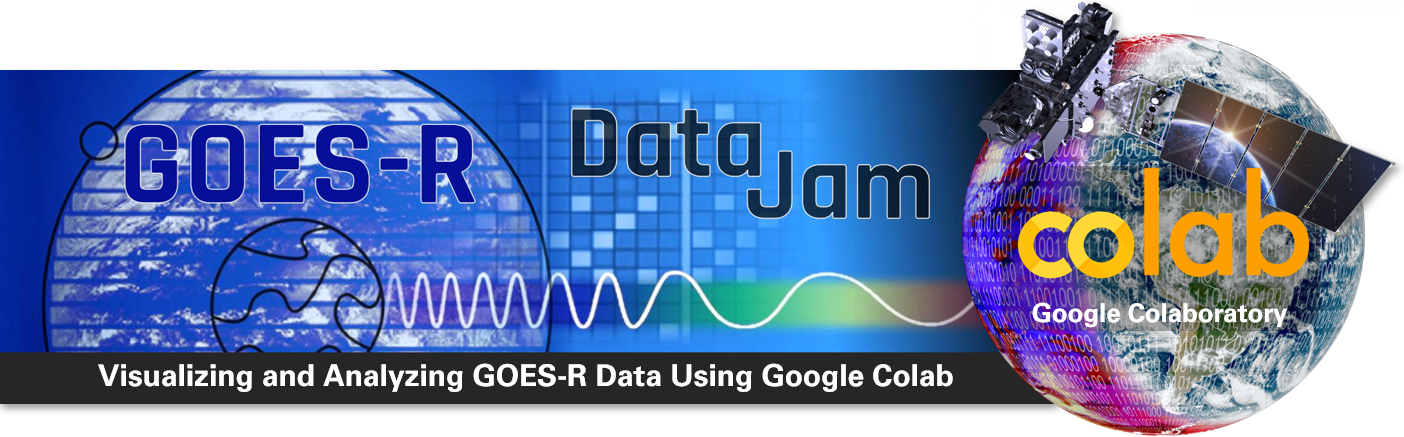

**Developed by:** Diego Souza - INPE / CGCT / DISSM - Brazil

**COLAB Notebook Version:** September 07, 2023

### **Contact:**
####Diego Souza - INPE / CGCT / DISSM - (diego.souza@inpe.br)
https://github.com/diegormsouza/